# Exploring Weather Trends

### Summary:
This project was written for Udacity’s Data Analyst nanodegree program. Here, local and global temperature data will be analyzed. The goal is to compare temperature trends and create visualizations using phyton3. Rio de Janeiro, in Brazil, was chosen to provide the local data.



### Data extraction

SELECT *
FROM city_list
WHERE country = 'Brazil';

SELECT *
FROM city_data
WHERE city = 'Rio De Janeiro';

SELECT *
FROM global_data;

**Note:** SQL queries were written to extract the global and city level average temperatures data from Udacity's workspace and export them to CSV files.

### Importing required libraries:

In [1]:
#Importing libraries for working with dataframes, calculating the moving average, and creating data visualizations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Loading data file into a dataframe:

In [2]:
#loading data file into a dataframe
global_temp = pd.read_csv('global_data.csv')
rio_temp = pd.read_csv('rio_data.csv')

### Checking the dataframes

In [3]:
#getting a concise summary of the dataframe
global_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      266 non-null    int64  
 1   avg_temp  266 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.3 KB


In [4]:
#getting a concise summary of the dataframe
rio_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      182 non-null    int64  
 1   city      182 non-null    object 
 2   country   182 non-null    object 
 3   avg_temp  175 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 5.8+ KB


In [5]:
#checking for unique entries in the dataframe
global_temp.nunique()

year        266
avg_temp    146
dtype: int64

In [6]:
#checking for unique entries in the dataframe
rio_temp.nunique()

year        182
city          1
country       1
avg_temp    120
dtype: int64

In [7]:
#returns the first n rows of the dataframe
global_temp.head()

,year,avg_temp
0,1750,8.72
1,1751,7.98
2,1752,5.78
3,1753,8.39
4,1754,8.47


In [8]:
#returns the first n rows of the dataframe
rio_temp.head()

,year,city,country,avg_temp
0,1832,Rio De Janeiro,Brazil,23.05
1,1833,Rio De Janeiro,Brazil,24.11
2,1834,Rio De Janeiro,Brazil,23.27
3,1835,Rio De Janeiro,Brazil,22.73
4,1836,Rio De Janeiro,Brazil,22.91


In [9]:
#returns the last n rows of the dataframe
global_temp.tail()

,year,avg_temp
261,2011,9.52
262,2012,9.51
263,2013,9.61
264,2014,9.57
265,2015,9.83


In [10]:
#returns the last n rows of the dataframe
rio_temp.tail()

,year,city,country,avg_temp
177,2009,Rio De Janeiro,Brazil,24.98
178,2010,Rio De Janeiro,Brazil,24.95
179,2011,Rio De Janeiro,Brazil,24.32
180,2012,Rio De Janeiro,Brazil,24.84
181,2013,Rio De Janeiro,Brazil,25.19


In [11]:
#returns the sum of NA values in the dataframe
global_temp.isnull().sum()

year        0
avg_temp    0
dtype: int64

In [12]:
#returns the sum of NA values in the dataframe
rio_temp.isnull().sum()

year        0
city        0
country     0
avg_temp    7
dtype: int64

**Note:**
* There are 266 entries in the global data, from 1750 to 2015;
* There are 182 entries in the global data, from 1832 to 2013;
* Global has no missing data, but Rio has 7 null entries.

### Data wrangling

In [13]:
#filling null values with the mean of avg_temp column
rio_temp['avg_temp'].fillna(rio_temp['avg_temp'].mean(),inplace = True)

In [14]:
#returns the sum of NA values in the dataframe: checking the changes
rio_temp.isnull().sum()

year        0
city        0
country     0
avg_temp    0
dtype: int64

In [15]:
#Adjusting the global dataframe to Rio's lenght (1832-2013) and assigning it to a new dataframe
adj_global_temp = global_temp[(global_temp.year >= 1832) & (global_temp.year <= 2013)]

In [16]:
#returns the first n rows of the dataframe: checking the changes
adj_global_temp.head()

,year,avg_temp
82,1832,7.45
83,1833,8.01
84,1834,8.15
85,1835,7.39
86,1836,7.70


In [17]:
#returns the last n rows of the dataframe: checking the changes
adj_global_temp.tail()

,year,avg_temp
259,2009,9.51
260,2010,9.70
261,2011,9.52
262,2012,9.51
263,2013,9.61


In [18]:
#getting a concise summary of the dataframe: checking the changes
adj_global_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182 entries, 82 to 263
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      182 non-null    int64  
 1   avg_temp  182 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.3 KB


**Note:**
* For the local data, the 7 null entries in the "avg_temp" column were replaced with the mean of the average temperature for the whole period;
* Since the global data covers a longer period, an djustment was made so that both sets had the same range, from 1832 to 2013.

### Data Description 

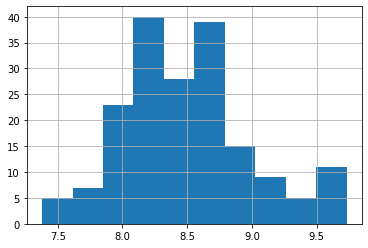

In [19]:
#histogarm plot for global data
adj_global_temp['avg_temp'].hist();

In [20]:
adj_global_temp['avg_temp'].describe()

count    182.000000
mean       8.486374
std        0.496309
min        7.380000
25%        8.135000
50%        8.485000
75%        8.750000
max        9.730000
Name: avg_temp, dtype: float64

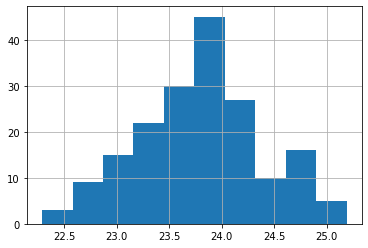

In [21]:
#histogarm plot for Rio data
rio_temp['avg_temp'].hist();

In [22]:
rio_temp['avg_temp'].describe()

count    182.000000
mean      23.791486
std        0.585305
min       22.290000
25%       23.402500
50%       23.795743
75%       24.192500
max       25.190000
Name: avg_temp, dtype: float64

### Calculating the temperature moving average

Moving averages are used to smooth out data to make it easier to observe long term trends and not get lost in daily fluctuations.

In [23]:
#Calculating the moving averages
global_mv_avg = adj_global_temp['avg_temp'].rolling(10).mean()
rio_mv_avg = rio_temp['avg_temp'].rolling(10).mean()

### Data visualization

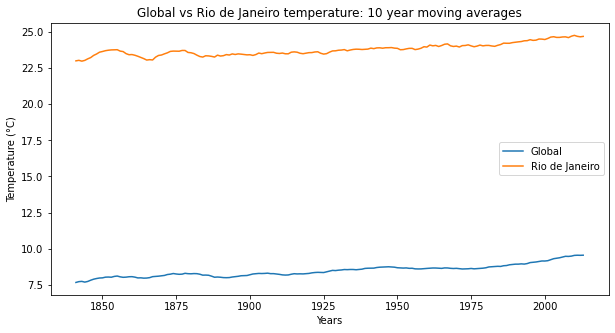

In [24]:
#Plotting the ine chart with local and global temperature trends
plt.figure(figsize=[10,5])
plt.plot(adj_global_temp['year'], global_mv_avg, label='Global')
plt.plot(rio_temp['year'], rio_mv_avg, label='Rio de Janeiro')
plt.legend()
plt.xlabel("Years")
plt.ylabel("Temperature (°C)") 
plt.title("Global vs Rio de Janeiro temperature: 10 year moving averages")
plt.show()

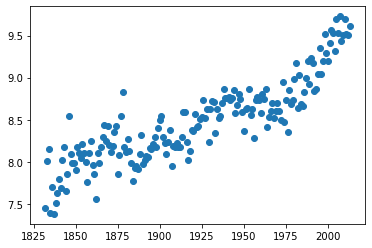

In [25]:
#scatter plot for the global data
plt.scatter(adj_global_temp['year'],adj_global_temp['avg_temp']);

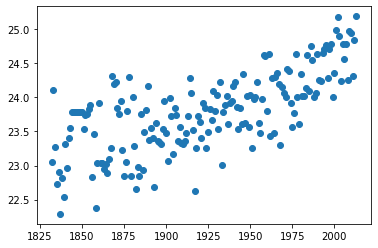

In [26]:
#scatter plot for the Rio data
plt.scatter(rio_temp['year'],rio_temp['avg_temp']);

In [27]:
# Pearson correlation coeffecient for global data
corr_global = adj_global_temp.corr(method='pearson')
corr_global

,year,avg_temp
year,1.000000,0.876638
avg_temp,0.876638,1.000000


In [28]:
# Pearson correlation coeffecient for Rio data
corr_rio = rio_temp.corr(method='pearson')
corr_rio

,year,avg_temp
year,1.000000,0.691134
avg_temp,0.691134,1.000000


### Final observations

1. Compared to the global data, the mean of the average temperature in Rio de Janeiro for the period is much higher. That makes sense, since Rio is a coastal city in an tropical country;
2. The five number summaries and the histogarm plots show that, in both cases, the distributions have lower variability, meaning that the values tend to be close to the means. The mean of the average global temperature is 8.48°C, the minimum is 7.38°C, the maximum is 9.73°C, and the standard deviation is 0.49.The mean of average temperature in Rio de Janeiro is 23.79°C, the  minimum is 22.29°C, the maximum is 25.19°C, and the standard deviation is 0.58. Both data sets have similar ranges, even though the range of average temperature in Rio de Janeiro (2.9°C) is slightly larger than the global (2.35°C).
3. In the chart line representing the 10 year moving averages, both lines show the same overall trend with a gradual increase of the average temperature during the period, which grew more rapidly in the last few years;
4. The scatter plots and the correlation coefficien calculated between years and average temperatures show a strong and positive relationship for the global case and a moderate and positive relationship for the Rio case, confirming the increase of temperatures over the years, but showing differences between the strengths. Therefore, it is possible to say that the global case shows a stronger warming trend.